# 特徴量エンジニアリング手法
### 参考
- https://yolo-kiyoshi.com/2019/03/23/post-1111/

### データ準備を行う
- https://www.kaggle.com/rakannimer/air-passengers
- 1949年から1960年における月別の国際線乗客数データ

In [1]:
# ライブラリ
## データ解析を支援する機能を提供するライブラリ
import pandas as pd
## Pythonおよびその科学計算用ライブラリNumPyのためのグラフ描画ライブラリ
import matplotlib.pyplot as plt
## seabornでmatplotlibのグラフをかっこよくできる
import seaborn as sns

# #.ipynbを.pyとして使用したいときに、get_ipythonのerrorが出るので、それを回避するための方法としてこのやり方
# # - https://qiita.com/nogut0123/items/2c83e30e274e5a51cb41
%matplotlib inline

In [2]:
# データの読み込み
AirPassengers = pd.read_csv('./data/AirPassengers.csv')

In [3]:
# データの冒頭を出力
AirPassengers.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


Text(0.5, 1.0, 'Monthly total number of passengers')

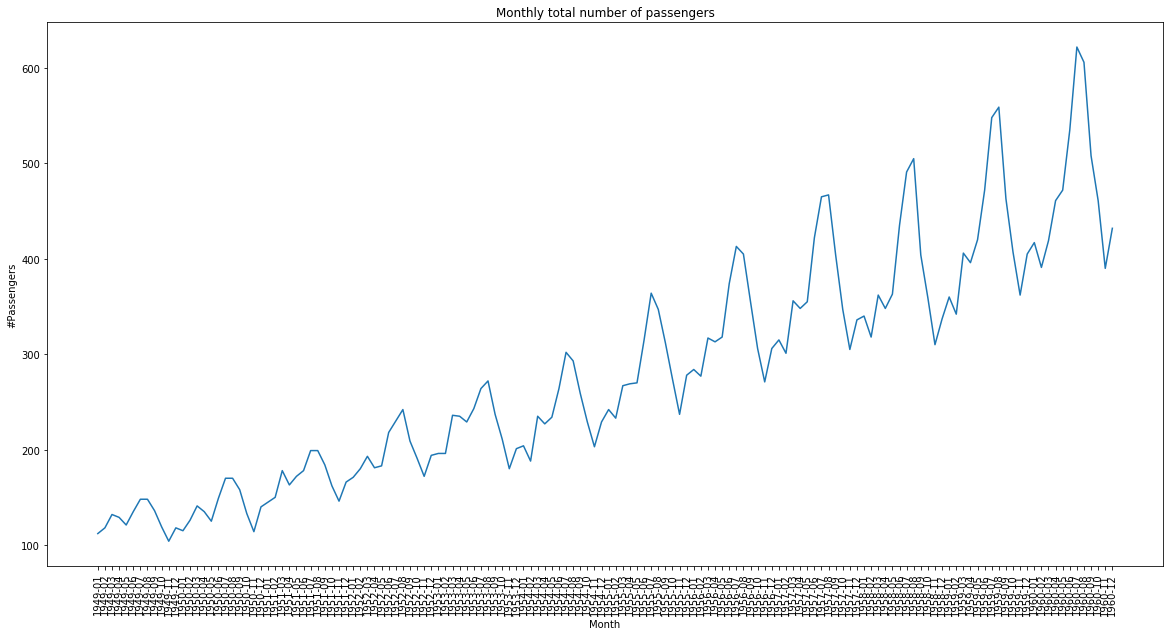

In [4]:
# 月次トレンドを可視化

## figsize：図のサイズ
plt.figure(figsize=(20, 10))

## lineplot：線グラフの線の幅を縮小拡大
sns.lineplot(x='Month', y='#Passengers', data=AirPassengers)

## xticks：X 軸の目盛りラベルテキストを回転させる
plt.xticks(rotation=90) 

## title：タイトルをつける
plt.title('Monthly total number of passengers')

# 特徴量エンジニアリング手法

## 日付・時間に関する特徴量

### 与えられた時系列データを整形し、主に以下のような粒度の日付・時間に関する特徴量を生成
- 年
- 月
- 日
- 曜日
- クオータの1月目、2月目、3月目
- 時間
- 分
- 秒

In [5]:
# 年、月の特徴量を生成
AirPassengers['Year'] = AirPassengers['Month'].map(lambda x: x.split('-')[0])
AirPassengers['Month'] = AirPassengers['Month'].map(lambda x: x.split('-')[1])

#カラムの順番を変更
AirPassengers = AirPassengers.loc[:,['Year','Month','#Passengers']]
AirPassengers.head()

,Year,Month,#Passengers
0,1949,01,112
1,1949,02,118
2,1949,03,132
3,1949,04,129
4,1949,05,121


## ラグ特徴量

- 現在よりも過去の実績値を特徴量として使用→ラグ特徴量

In [7]:
# ユニークキーでソート
## reset_index：DataFrameのインデックスを振り直す。dropは、index列を作らない場合、True
AirPassengers = AirPassengers.sort_values(
    ['Year', 'Month'],
    ascending=[True, True]
).reset_index(drop=True)
 
#ラグに使用する値のリスト
lags = [1,2,3]
for lag in lags:
    AirPassengers = pd.concat(
        [AirPassengers, AirPassengers['#Passengers'].shift(lag).rename('#Passengers_' + str(lag))],
        axis=1
    )

AirPassengers.head()

,Year,Month,#Passengers,#Passengers_1,#Passengers_2,#Passengers_3
0,1949,01,112,NaN,NaN,NaN
1,1949,02,118,112.0,NaN,NaN
2,1949,03,132,118.0,112.0,NaN
3,1949,04,129,132.0,118.0,112.0
4,1949,05,121,129.0,132.0,118.0


In [9]:
# 現在よりも3ヶ月前までの実績値の平均を特徴量として生成

# 過去3ヶ月の平均を算出する（現在月含まない）
AirPassengers = pd.concat(
    [
        AirPassengers,
        AirPassengers['#Passengers'].rolling(3).mean().shift(1).rename('rolling_mean_3')
    ],
    axis=1
)
AirPassengers.head()

,Year,Month,#Passengers,#Passengers_1,#Passengers_2,#Passengers_3,rolling_mean_3,rolling_mean_3
0,1949,01,112,NaN,NaN,NaN,NaN,NaN
1,1949,02,118,112.0,NaN,NaN,NaN,NaN
2,1949,03,132,118.0,112.0,NaN,NaN,NaN
3,1949,04,129,132.0,118.0,112.0,120.666667,120.666667
4,1949,05,121,129.0,132.0,118.0,126.333333,126.333333
